![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

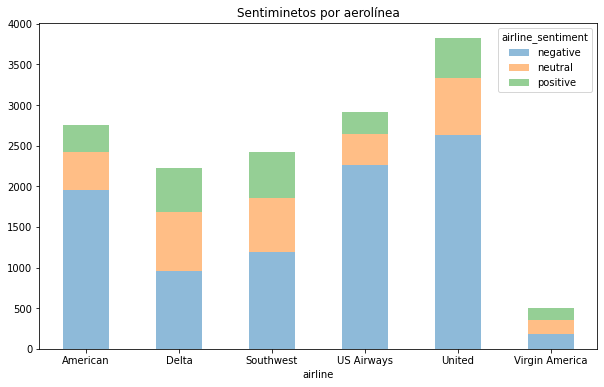

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
!pip install scikit-plot

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_precision_recall
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

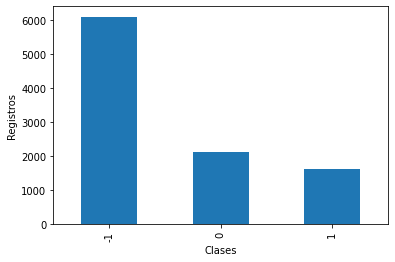

In [12]:
# gráfica comparativa de clases
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Registros')
plt.xlabel('Clases')
plt.show()

In [13]:
# Funcion desempeño y gráficas
def desempeno(modelo, temp_test_1, y_test):
  # Predecir
  y_pred = modelo.predict(temp_test_1)

  y_prob = modelo.predict_proba(temp_test_1)

  accuracy_n1 = accuracy_score(y_pred == -1, y_test.values == -1)
  accuracy_0 = accuracy_score(y_pred == 0, y_test.values == 0)
  accuracy_1 = accuracy_score(y_pred == 1, y_test.values == 1)
  print(classification_report(y_pred, y_test.values))
  print('Accuracy -1:', accuracy_n1)
  print('Accuracy 0:', accuracy_0)
  print('Accuracy 1', accuracy_1)

  # gráficas
  fig, ax = plt.subplots(2, 2, figsize=(20,10))
  plot_roc(y_test, y_prob, ax=ax[0,0])
  plot_precision_recall(y_test, y_prob, ax=ax[0,1])
  # grafica comparatica accuracy
  nombre = ['Punto 1']
  x_axis = np.arange(len(nombre))
  ax[1,0].set_title("Comparación de clases con Accuracy")
  ax[1,0].bar(x_axis -0.2, accuracy_n1, width=0.2, label = '-1')
  ax[1,0].bar(x_axis, accuracy_0, width=0.2, label = '0')
  ax[1,0].bar(x_axis +0.2, accuracy_1, width=0.2, label = '1')
  ax[1,0].legend()
  def addlabels(x,y,plotP):
    for i in range(len(x)):
      for j in range(len(y)):
        posx = [-0.2, 0, 0.2]
        plotP.text(i+posx[j]-0.03,y[j],y[j])
  addlabels(nombre,[round(accuracy_n1,6),round(accuracy_0,6),round(accuracy_1,6)],ax[1,0])

  plot_confusion_matrix(y_test, y_pred, normalize=True, ax=ax[1,1])

  # xtics gráfica comparativa accuracy
  plt.sca(ax[1, 0])
  plt.xticks(x_axis, nombre)
  plt.show()

  return (accuracy_n1, accuracy_0, accuracy_1)

In [14]:
# Balancea clasese por undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train.values.reshape(-1,1), y_train)

              precision    recall  f1-score   support

          -1       0.70      0.90      0.79      2404
           0       0.75      0.45      0.56      1621
           1       0.67      0.64      0.65       807

    accuracy                           0.71      4832
   macro avg       0.71      0.66      0.67      4832
weighted avg       0.71      0.71      0.69      4832

Accuracy -1: 0.7626241721854304
Accuracy 0: 0.7651076158940397
Accuracy 1 0.8878311258278145


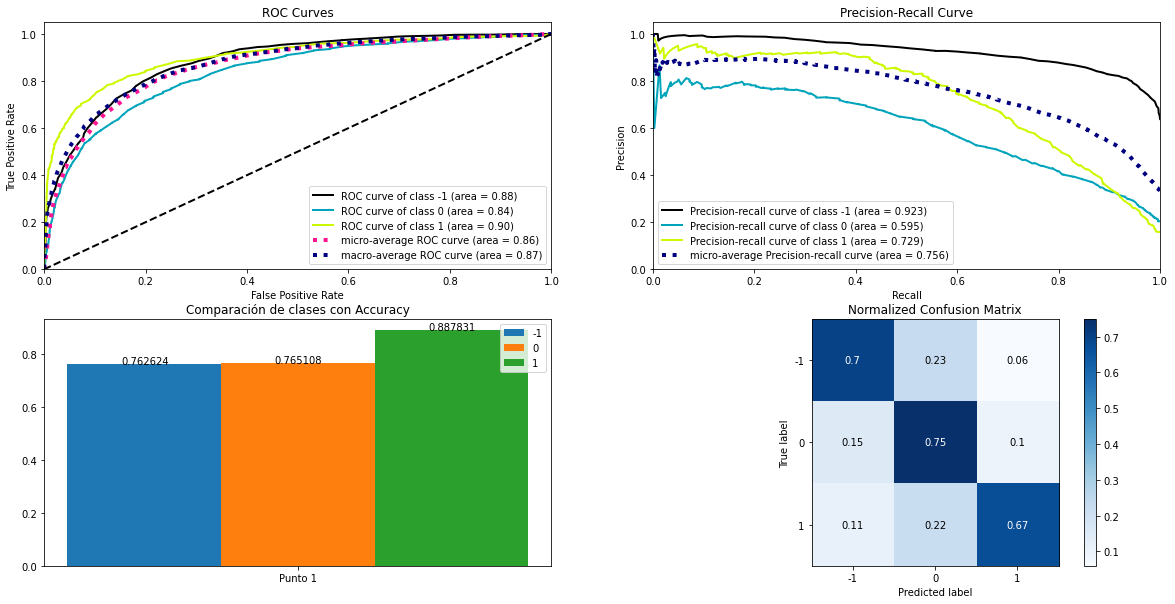

In [15]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_1 = CountVectorizer(dtype=np.int8)
X_dtm_1 = vect_1.fit_transform(X_under.flatten())
temp_1 = X_dtm_1.todense()

# Entrenamiento (fit) del modelo RandomForestClassifier
reg_1 = RandomForestClassifier()
reg_1.fit(X_dtm_1, y_under)

# transformar X_test
X_test_dtm_1 = vect_1.transform(X_test)
temp_test_1 = X_test_dtm_1.todense()

# Mide desempeño
accuracy1_n1, accuracy1_0, accuracy1_1 = desempeno(reg_1, temp_test_1, y_test)

Teniendo en cuenta que las clases estaban muy desbalanceadas, se aplicó un método de undersampling para nivelar las clases.

El modelo "Uso de CountVectorizer" presenta un Accuracy general de 0.71 y accuracys por clase de 0.76, 0.76 y 0.88 para las clases -1, 0 y 1 respectivamente y su desempeño mejora comparado contra el resultado de aplicar el modelo con los datos desbalanceados.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

              precision    recall  f1-score   support

          -1       0.60      0.91      0.73      2042
           0       0.70      0.40      0.50      1725
           1       0.74      0.53      0.61      1065

    accuracy                           0.64      4832
   macro avg       0.68      0.61      0.62      4832
weighted avg       0.67      0.64      0.62      4832

Accuracy -1: 0.7096440397350994
Accuracy 0: 0.7224751655629139
Accuracy 1 0.8538907284768212


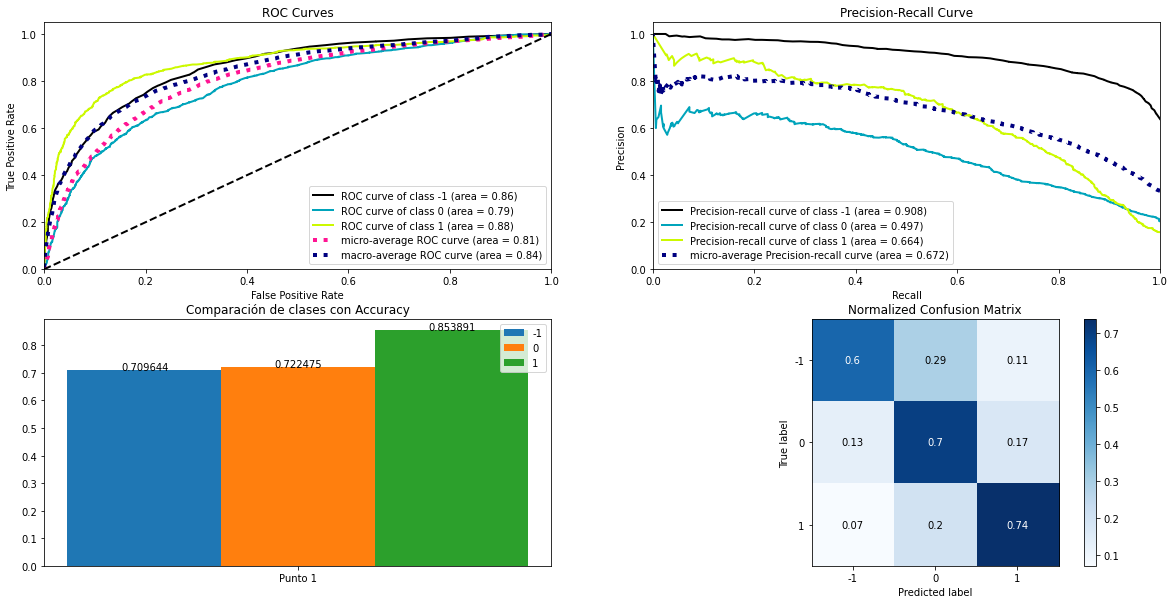

In [16]:
# Celda 2
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_2 = CountVectorizer(stop_words='english', dtype=np.int8)
X_dtm_2 = vect_2.fit_transform(X_under.flatten())
temp_2 = X_dtm_2.todense()

# Entrenamiento (fit) del modelo RandomForestClassifier
reg_2 = RandomForestClassifier()
reg_2.fit(X_dtm_2, y_under)

# transformar X_test
X_test_dtm_2 = vect_2.transform(X_test)
temp_test_2 = X_test_dtm_2.todense()

# Mide desempeño
accuracy2_n1, accuracy2_0, accuracy2_1 = desempeno(reg_2, temp_test_2, y_test)

El modelo "Eliminación de Stopwords" presenta un Accuracy general de 0.64 y accuracys por clase de 0.70, 0.72 y 0.85 para las clases -1, 0 y 1 respectivamente y su desempeño empeora comparado contra el modelo anterior pero consideramos que si se tuviesen muchos mas registros, teóricamente el modelo presentaría un mejor desempeño contra el modelo anterior.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

              precision    recall  f1-score   support

          -1       0.74      0.91      0.82      2511
           0       0.72      0.51      0.60      1384
           1       0.76      0.62      0.68       937

    accuracy                           0.74      4832
   macro avg       0.74      0.68      0.70      4832
weighted avg       0.74      0.74      0.73      4832

Accuracy -1: 0.7872516556291391
Accuracy 0: 0.8038079470198676
Accuracy 1 0.8870033112582781


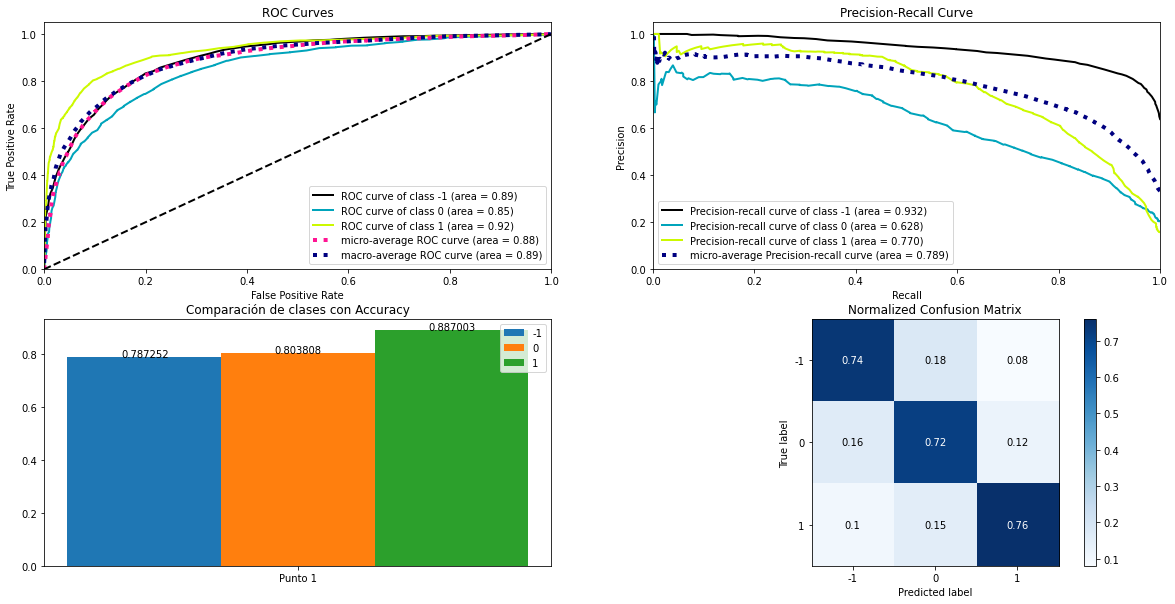

In [17]:
# Celda 3
# Clase Lematiza
class LemmaTokenizer(object):
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, articles):
    return [self.wnl.lemmatize(t, pos='v') for t in word_tokenize(articles)]

# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_3 = CountVectorizer(tokenizer=LemmaTokenizer(), dtype=np.int8)
X_dtm_3 = vect_3.fit_transform(X_under.flatten())
temp_3 = X_dtm_3.todense()

# Entrenamiento (fit) del modelo RandomForestRegressor
reg_3 = RandomForestClassifier()
reg_3.fit(X_dtm_3, y_under)

# transformar X_test
X_test_dtm_3 = vect_3.transform(X_test)
temp_test_3 = X_test_dtm_3.todense()

# Mide desempeño
accuracy3_n1, accuracy3_0, accuracy3_1 = desempeno(reg_3, temp_test_3, y_test)

El modelo "Lematización con verbos" presenta un Accuracy general de 0.74 y accuracys por clase de 0.78, 0.80 y 0.88 para las clases -1, 0 y 1 respectivamente y su desempeño mejora comparado contra el primer modelo debido al uso de lematización con la que se transforman las palabras a su forma base o de diccionario considerando el contexto de la palabra.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

              precision    recall  f1-score   support

          -1       0.66      0.92      0.77      2229
           0       0.71      0.45      0.56      1544
           1       0.79      0.57      0.66      1059

    accuracy                           0.69      4832
   macro avg       0.72      0.65      0.66      4832
weighted avg       0.71      0.69      0.68      4832

Accuracy -1: 0.7454470198675497
Accuracy 0: 0.7673841059602649
Accuracy 1 0.8725165562913907


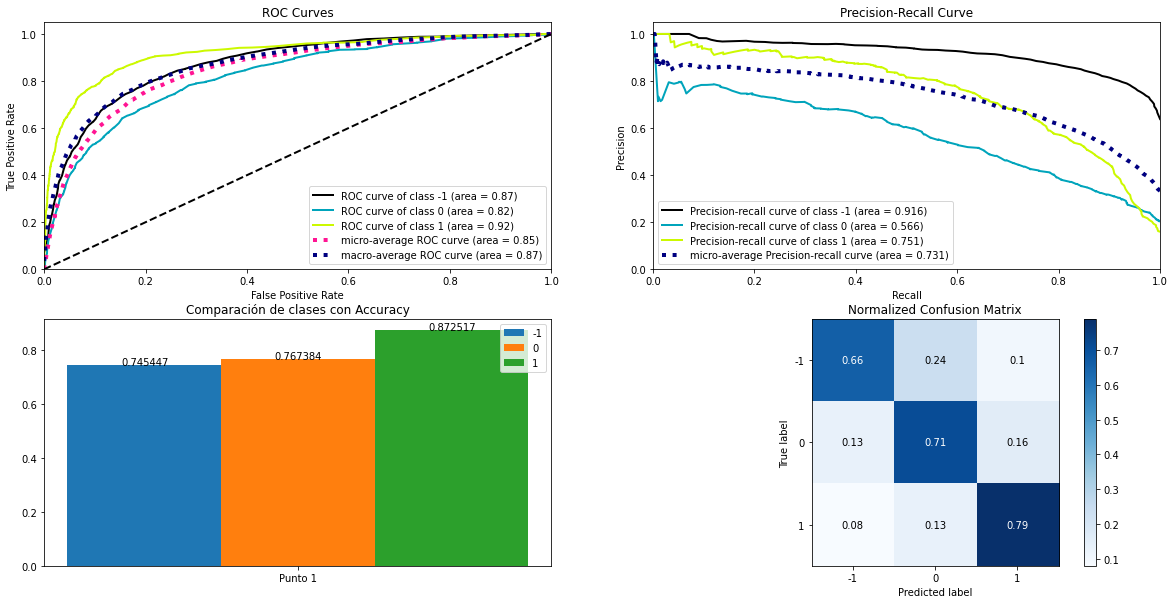

In [18]:
# Celda 4
# Clase Lematiza
class LemmaTokenizer(object):
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, articles):
    return [self.wnl.lemmatize(t, pos='v') for t in word_tokenize(articles)]

# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_4 = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', dtype=np.int8)
X_dtm_4 = vect_4.fit_transform(X_under.flatten())
temp_4 = X_dtm_4.todense()

# Entrenamiento (fit) del modelo RandomForestClassifier
reg_4 = RandomForestClassifier()
reg_4.fit(X_dtm_4, y_under)

# transformar X_test
X_test_dtm_4 = vect_4.transform(X_test)
temp_test_4 = X_test_dtm_4.todense()

# Mide desempeño
accuracy4_n1, accuracy4_0, accuracy4_1 = desempeno(reg_4, temp_test_4, y_test)

El modelo "Multiples técnicas" presenta un Accuracy general de 0.69 y accuracys por clase de 0.74, 0.76 y 0.87 para las clases -1, 0 y 1 respectivamente y su desempeño empeora comparado contra el modelo anterior pero consideramos que si se tuviesen muchos mas registros, teóricamente el modelo presentaría el mejor desempeño de los modelos presentados.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

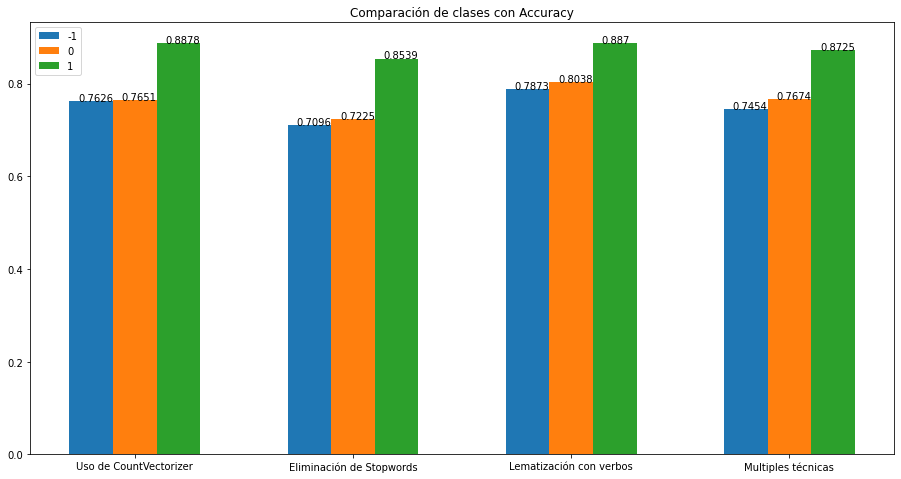

In [19]:
# Celda 5
# Gráfica de los Accuracy de los modelos utilizados
nombre = ['Uso de CountVectorizer', 'Eliminación de Stopwords', 'Lematización con verbos', 'Multiples técnicas']
accuracys_n1 = [accuracy1_n1, accuracy2_n1, accuracy3_n1, accuracy4_n1]
accuracys_0 = [accuracy1_0, accuracy2_0, accuracy3_0, accuracy4_0]
accuracys_1 = [accuracy1_1, accuracy2_1, accuracy3_1, accuracy4_1]
x_axis = np.arange(len(nombre))
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de clases con Accuracy")
ax.bar(x_axis -0.2, accuracys_n1, width=0.2, label = '-1')
ax.bar(x_axis, accuracys_0, width=0.2, label = '0')
ax.bar(x_axis +0.2, accuracys_1, width=0.2, label = '1')
ax.legend()
def addlabels(x,y,plotP):
  for i in range(len(x)):
    for j in range(len(y)):
      posx = [-0.2, 0, 0.2]
      plotP.text(i+posx[j]-0.06,round(y[j][i],4),round(y[j][i],4))
addlabels(nombre,[accuracys_n1,accuracys_0,accuracys_1],plt)
plt.xticks(x_axis, nombre)
plt.show()


Teniendo en cuenta que las clases estaban muy desbalanceadas, se aplicó un método de undersampling para nivelar las clases.

El mejor modelo fue "Lematización con verbos" con un Accuracy general de 0.74 y accuracys por clase de 0.78, 0.80 y 0.87 para las clases -1, 0 y 1 respectivamente, y su buen desmpeño se debe al uso de lematización con la que se transforman las palabras a su forma base o de diccionario considerando el contexto de la palabra, sin embargo consideramos que si se tuviesen muchos más registros, teóricamente el mejor modelo habría sido el de "Multiples técnicas" ya que en este se agrega a la lematización la eliminación de stop words.

En este caso el peor modelo fue "Eliminación de Stopwords" pero consideramos que es porque el modelo se vio afectado por el reducido número de registros ya que al eliminar las palabras de stop words perdió información en vez de mejorar el contexto, de lo contrario el peor modelo habría sido el primero "Uso de CountVectorizer" ya que es el menos robusto de los modelos presentados.

Finalmente consideramos que una de las desventajas de los modelos es que son afectados cuando se utilizan datasets pequeños y desbalanceados.